In [6]:
from scipy.stats import norm
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math
import statsmodels.api as sm

In [81]:
from statsmodels import nonparametric

x= [10,20,30,40,50,60,70,80,90,100,110,120]
y = [2337,2750,2301,2500,1700,2100,1100,1750,1000,1642, 2000,1932]


#kreg = nonparametric.kernel_regression.KernelReg(endog = y, exog = x, var_type='c',reg_type = "lc", bw ="10").fit([50,60])
#kreg = nonparametric.kernel_regression.KernelReg(endog = y, exog = x, var_type='c',reg_type = "ll", bw ="10").fit([50,60])
kregModel = nonparametric.kernel_regression.KernelReg(endog = y, exog = x, var_type='c',reg_type = "ll", bw =[10])
print( kregModel.fit([50,60,70]) )
print( kregModel.fit([80]) )

(array([1995.2876137 , 1759.98220898, 1535.13869725]), array([[-24.04975277],
       [-24.40621271],
       [-17.18519991]]))
(array([1425.3177186]), array([[-6.9977385]]))


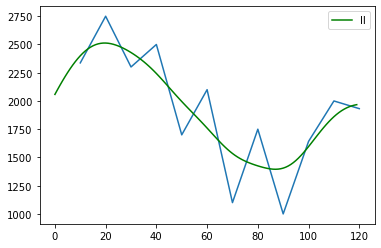

In [82]:

kreg_ll=[]
for i in range(0,120):    
    #kreg_ll.append(nonparametric.kernel_regression.KernelReg(endog = y, exog = x, var_type='c',reg_type = "ll", bw ="10").fit([i])[0][0])
    kreg_ll.append(kregModel.fit([i])[0][0])
plt.plot(x,y)    
plt.plot(range(0,120), kreg_ll, color = "green", label = "ll")
plt.legend()
plt.show()

In [9]:
def data(sammple_size, sigma):
    x = np.linspace(start=0, stop=1, num=sammple_size)
    f_x = np.sin((4*np.pi)*x) + np.sin((7*np.pi)*x)
        
    epsilon = np.random.normal(loc=0, scale=sigma, size=sammple_size)
    
    # Observed Data
    y = f_x + epsilon
    
    return x, y, f_x

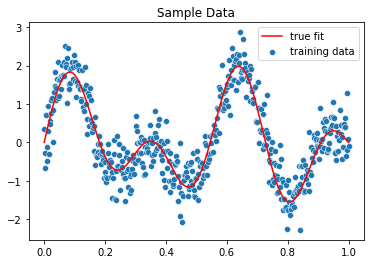

In [12]:
NUM_OF_FEATURES = 1
SIGMA = 0.4

TRAIN_SAMPLES = 500
X_TRAIN, Y_TRAIN, TRUE_FIT = data(TRAIN_SAMPLES, SIGMA)

fig, ax = plt.subplots()
import seaborn as sns
# TRAINING DATA
sns.scatterplot(x=X_TRAIN, y=Y_TRAIN, label='training data', ax=ax);
# TRUE FIT
sns.lineplot(x=X_TRAIN, y=TRUE_FIT, color='red', label='true fit', ax=ax);
ax.set(title='Sample Data')
ax.legend(loc='upper right');

In [84]:
#kregModel = nonparametric.kernel_regression.KernelReg(endog = Y_TRAIN, exog = X_TRAIN, var_type='c',reg_type = "lc", bw ="0.2")
kregModel = nonparametric.kernel_regression.KernelReg(endog = Y_TRAIN, exog = X_TRAIN, var_type='c',reg_type = "ll", bw =[0.01], ckertype='gaussian')

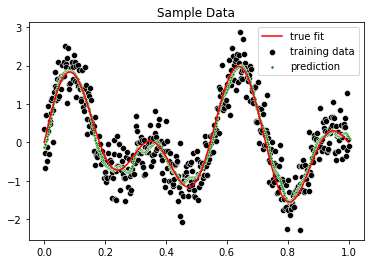

In [86]:
#print(X_TRAIN.shape[0])
#i=2
#print([X_TRAIN[i]])
#print(np.array(X_TRAIN[i]))
#kregModel.fit([X_TRAIN[i]])[0][0]
kreg_ll=[]
for i in range(0,X_TRAIN.shape[0]):    
    #kreg_ll.append(nonparametric.kernel_regression.KernelReg(endog = y, exog = x, var_type='c',reg_type = "ll", bw ="10").fit([i])[0][0])
    #print(X_TRAIN[i])
    kreg_ll.append(kregModel.fit([X_TRAIN[i]])[0][0])    

#plt.plot(X_TRAIN, kreg_ll, color = "green", label = "ll")
#plt.legend()
#plt.show()



fig, ax = plt.subplots()
import seaborn as sns
# TRAINING DATA
sns.scatterplot(x=X_TRAIN, y=Y_TRAIN, color='black', label='training data', ax=ax);
# TRUE FIT
sns.lineplot(x=X_TRAIN, y=TRUE_FIT, color='red', label='true fit', ax=ax);
sns.scatterplot(x=X_TRAIN, y=kreg_ll, color='green', marker='.', label='prediction', ax=ax);

ax.set(title='Sample Data')
ax.legend(loc='upper right');



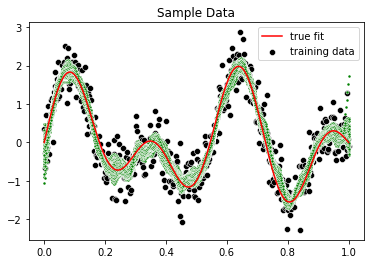

In [107]:
import numpy as np
n = X_TRAIN.shape[0] #size of the sample you want


fig, ax = plt.subplots()
import seaborn as sns
# TRAINING DATA
sns.scatterplot(x=X_TRAIN, y=Y_TRAIN, color='black', label='training data', ax=ax);
# TRUE FIT
sns.lineplot(x=X_TRAIN, y=TRUE_FIT, color='red', label='true fit', ax=ax);

for h in range(100):
    IDXall = np.random.choice(range(n),n)
    IDX = np.unique(IDXall)
    #print(IDX.shape[0])
    #print(IDX)
    Y_TRAIN_part = Y_TRAIN[IDX]
    X_TRAIN_part = X_TRAIN[IDX]

    kregModel_part = nonparametric.kernel_regression.KernelReg(endog = Y_TRAIN_part, exog = X_TRAIN_part, var_type='c',reg_type = "ll", bw =[0.01], ckertype='gaussian')
    kreg_ll=[]
    for i in range(0,X_TRAIN.shape[0]):    
        kreg_ll.append(kregModel_part.fit([X_TRAIN[i]])[0][0])    
    #sns.scatterplot(x=X_TRAIN, y=kreg_ll, color='green', marker='.', label='prediction', ax=ax);
    sns.scatterplot(x=X_TRAIN, y=kreg_ll, color='green', marker='.', ax=ax);

ax.set(title='Sample Data')
ax.legend(loc='upper right');